In [27]:
#pip install lightgbm


In [28]:
import joblib
import pandas as pd
import threading
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv("DatasetInitalComplete.csv", low_memory=False)
data = data.drop(["7","10","11","13","14"],axis = 1)

In [30]:
data.shape

(400000, 53)

In [31]:
data

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,...,1,2,3,4,5,6,8,9,12,15
0,1,80.0,0.0,0.0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,75.0,1.0,3.0,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,80.0,1.0,0.0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,60.0,1.0,4.0,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,55.0,1.0,1.0,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,60.0,0.0,1.0,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,65.0,1.0,4.0,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,65.0,0.0,4.0,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,50.0,1.0,4.0,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [32]:
data.columns

Index(['target', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B',
       'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext',
       'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'mel_mitotic_index', 'mel_thick_mm',
       'tbp_lv_dnn_lesion_confidence', '0', '1', '2', '3', '4', '5', '6', '8',
       '9', '12', '15'],
      dtype='object')

In [33]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns

# Convert to a list if needed
non_numerical_columns_list = list(non_numerical_columns)

print(non_numerical_columns_list)

[]


In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
import pickle

data_new = data
data1 = {}
save_file = open("cases.dat", "wb")

for j in non_numerical_columns_list:
    a = list(set(list(data_new[j])))
    index = 0
    dic = {}
    for i in a:
        dic[i] = index
        index += 1

    data1[j] = dic

pickle.dump(data1, save_file)
save_file.close()

In [37]:
data_file = open("cases.dat", "rb")
cases = pickle.load(data_file)
type(cases)
data_file.close()

In [38]:
for i in cases:
    for j in cases[i]:
        data_new[i] = data_new[i].replace(j, cases[i][j])
        

In [39]:
classes = []
for column in non_numerical_columns_list:
    data[column] = le.fit_transform(data[column])
    print(le.classes_)
    classes.append(le.classes_)

In [40]:
import pickle
data_file = open("cases.dat", "rb")
cases = pickle.load(data_file)
type(cases)
data_file.close()

In [41]:
for i in cases:
    for j in cases[i]:
        data_new[i] = data_new[i].replace(j, cases[i][j])

In [42]:
data_new

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,...,1,2,3,4,5,6,8,9,12,15
0,1,80.0,0.0,0.0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,75.0,1.0,3.0,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,80.0,1.0,0.0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,60.0,1.0,4.0,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,55.0,1.0,1.0,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,60.0,0.0,1.0,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,65.0,1.0,4.0,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,65.0,0.0,4.0,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,50.0,1.0,4.0,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [43]:
df_sorted = data.sort_values(by='target',ascending = False)
df_target_1 = data[data['target'] == 1]
df_target_0 = data[data['target'] == 0]

#df_target_0[:392]
batch1 = pd.concat([df_target_1, df_target_0[:]], ignore_index=True)
batch1


,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,...,1,2,3,4,5,6,8,9,12,15
0,1,80.0,0.0,0.0,9.27,18.093367,13.054772,19.090458,21.211776,26.302386,...,0.992879,1.614020,0.472059,5.650503,0.037528,0.952930,0.240838,37.515355,5.879538,0.141073
1,1,75.0,1.0,3.0,3.88,26.187010,21.394010,25.553420,24.914770,36.588750,...,0.998616,1.438920,0.526167,4.973141,0.088282,0.991787,0.315452,29.518401,4.764154,0.181296
2,1,80.0,1.0,0.0,6.55,33.480140,24.249430,26.160100,25.295430,42.488470,...,0.976854,2.008492,0.403345,8.597085,0.034536,0.849163,0.192565,56.186421,7.140923,0.150849
3,1,60.0,1.0,4.0,5.27,25.872050,20.194650,26.805590,28.459890,37.254570,...,0.973226,1.863920,0.404943,6.184975,0.042374,0.832057,0.194337,38.999721,6.448128,0.180971
4,1,55.0,1.0,1.0,5.29,30.966662,22.008635,24.066940,26.734379,39.219278,...,0.980691,1.882010,0.409715,6.650251,0.038820,0.877775,0.197552,42.312589,6.516821,0.165631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,60.0,0.0,1.0,3.10,20.396390,8.700477,19.498260,22.526430,28.216930,...,0.993499,0.700879,0.693530,1.181281,0.080221,0.964553,0.436643,6.484213,2.356538,0.211512
399996,0,65.0,1.0,4.0,2.66,18.325057,14.385684,27.391522,25.084622,32.956080,...,0.974921,1.771508,0.421346,5.659397,0.039210,0.857096,0.208423,32.171421,5.665769,0.164087
399997,0,65.0,0.0,4.0,4.66,21.155608,17.250798,27.887630,23.743460,35.003995,...,0.969403,1.930678,0.393691,6.472789,0.040591,0.806044,0.183824,41.111117,6.841718,0.177144
399998,0,50.0,1.0,4.0,2.62,20.209510,16.428130,34.063210,31.104090,39.607160,...,0.971324,1.683367,0.430196,4.941759,0.044474,0.823461,0.211837,30.236066,5.675103,0.182123


In [44]:
#pip install matplotlib

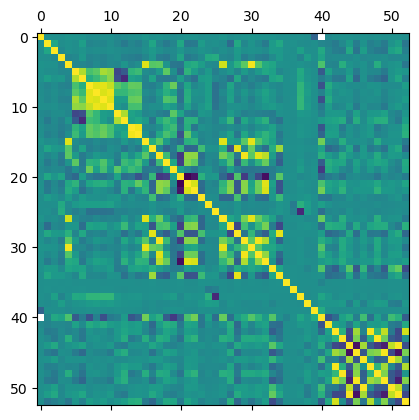

In [45]:
correlation_matrix = batch1.corr()
import matplotlib.pyplot as plt
plt.matshow(correlation_matrix, cmap='viridis')
plt.show()


In [46]:
correlated_pairs = []
threshold = 0.95
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if ((correlation_matrix.iloc[i, j]) > threshold):
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_pairs.append((colname1, colname2, correlation_matrix.iloc[i, j]))

# Print the correlated pairs
print("Pairs of columns with correlation above threshold:")
print(len(correlated_pairs))
for pair in correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} with correlation: {pair[2]:.2f}")

Pairs of columns with correlation above threshold:
9
Columns: tbp_lv_Lext and tbp_lv_L with correlation: 0.96
Columns: tbp_lv_norm_color and tbp_lv_color_std_mean with correlation: 0.96
Columns: tbp_lv_perimeterMM and clin_size_long_diam_mm with correlation: 0.96
Columns: tbp_lv_radial_color_std_max and tbp_lv_norm_color with correlation: 0.96
Columns: 5 and 0 with correlation: 0.97
Columns: 6 and 1 with correlation: 0.99
Columns: 8 and 3 with correlation: 0.97
Columns: 9 and 4 with correlation: 0.98
Columns: 12 and 2 with correlation: 0.98


In [47]:
train_set, test_set = train_test_split(batch1, test_size=0.1, stratify=batch1['target'], random_state=42)
scaler = StandardScaler()
X_train = train_set.drop(columns=['target'])
y_train = train_set['target']
X_test = test_set.drop(columns=['target'])
y_test = test_set['target']
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
tprsacc = []
final_predict_data = data.drop(["target"],axis=1)

def trainer(number,batch):
    #print(pd.DataFrame(batch))
    #print(number)
    scaler = StandardScaler()

    train_set, test_set = train_test_split(batch, test_size=0.2, stratify=batch['target'], random_state=42)
    X_train = train_set.drop(columns=['target'])
    y_train = train_set['target']
    X_test = test_set.drop(columns=['target'])
    y_test = test_set['target']
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = lgb.LGBMClassifier(verbose=-1)
    model.fit(X_train, y_train)
    print("model"+str(number))
    name = "model" + str(number) + ".joblib"
    
    predictions = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    accuracy = accuracy_score(y_test,predictions)
    tprsacc.append((tp/(tp+fn),accuracy))

    joblib.dump(model, name)
    
    #predictions = model.predict(X_test)
    #tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    #accuracy = accuracy_score(y_test,predictions)
    #print("model number"+str(i)+" true positives: "+str(tp/(tp+fn)))
    #print("model number"+str(i)+" accuracu: "+str(accuracy))
    
    
    # Make predictions and evaluate
    
    

In [50]:
threads = []
import time

start_time = time.time()

for i in range(0,1018):
    batch = batch1 = pd.concat([df_target_1, df_target_0[i*392:(i*392)+392]], ignore_index=True)
       
    thread = threading.Thread(target=trainer, args=(i,batch))
    threads.append(thread)
    thread.start()
end_time = time.time()
total_time = end_time - start_time
total_time
#batch

56.27564001083374

In [54]:
tprsacc 

[(0.8717948717948718, 0.8152866242038217),
 (0.8461538461538461, 0.821656050955414),
 (0.8461538461538461, 0.821656050955414),
 (0.8589743589743589, 0.821656050955414),
 (0.8589743589743589, 0.8280254777070064),
 (0.8589743589743589, 0.8280254777070064),
 (0.8717948717948718, 0.8280254777070064),
 (0.8846153846153846, 0.8280254777070064),
 (0.8846153846153846, 0.8343949044585988),
 (0.8589743589743589, 0.8343949044585988),
 (0.8717948717948718, 0.8343949044585988),
 (0.8846153846153846, 0.8343949044585988),
 (0.8717948717948718, 0.8343949044585988),
 (0.8461538461538461, 0.8343949044585988),
 (0.8461538461538461, 0.8343949044585988),
 (0.8717948717948718, 0.8343949044585988),
 (0.8974358974358975, 0.8343949044585988),
 (0.8846153846153846, 0.8343949044585988),
 (0.8717948717948718, 0.8407643312101911),
 (0.8589743589743589, 0.8407643312101911),
 (0.8589743589743589, 0.8407643312101911),
 (0.8846153846153846, 0.8407643312101911),
 (0.8589743589743589, 0.8407643312101911),
 (0.8974358974

In [62]:
sorted_based_on_tp = max(tprsacc , key=lambda x: x[0])
sorted_based_on_tp

(0.9230769230769231, 0.8726114649681529)

In [63]:
sorted_based_on_acc = max(tprsacc , key=lambda x: x[1])
sorted_based_on_acc

(0.9102564102564102, 0.9299363057324841)